In [64]:
import cv2
import matplotlib.pyplot as plt
import numpy as np

In [65]:
def resize(image):
    scale_percent = 10 # percent of original size
    width = int(image.shape[1] * scale_percent / 100)
    height = int(image.shape[0] * scale_percent / 100)
    dim = (width, height)
    resized = cv2.resize(image, dim, interpolation = cv2.INTER_AREA)
    
    return resized

def preprocess(image):
    im_gray = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)
    im_blur = cv2.medianBlur(im_gray, 5)
    
    return im_blur

def cornerExtract(image, im_blur, numCorners):
    
    #canny edge extraction
    edges = cv2.Canny(im_blur,100,200)
    
    #edge dilation
    kernel = np.ones((5, 5), np.uint8)
    dilated_image = cv2.dilate(edges,kernel,iterations=1)
    eroded_image = cv2.erode(dilated_image, kernel, iterations=1)
    corners = cv2.goodFeaturesToTrack(eroded_image,numCorners,0.06,25)
    corners = np.float32(corners)
    
    for corner in corners:
        x,y = corner[0]
        cv2.circle(image,(x,y),7,255,-1)
    
    implot(dilated_image)
    implot(image)

    return corners

def implot(image):
    plt.imshow(image,cmap = 'gray')
    plt.show(image.any)

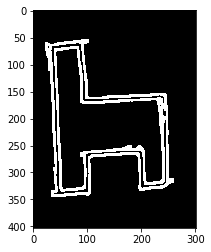

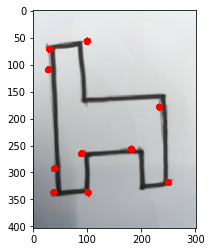

In [68]:
if __name__ == '__main__':
    
#     imagePath, numCorners = "images/box.jpg", 4
    imagePath, numCorners = "images/chair.jpg", 10
    image = cv2.imread(imagePath)
    
    resized = resize(image)
    blurred = preprocess(resized)
    cornerExtract(resized, blurred, numCorners)